In [1]:
import requests
from bs4 import BeautifulSoup

base_url = 'https://quotes.toscrape.com'

In [4]:
response = requests.get(base_url)

In [5]:
soup = BeautifulSoup(response.text, 'html.parser')

In [6]:
# Extract all texts within <span> elements with class 'text'
all_quotes = [span.get_text() for span in soup.find_all('span', class_='text')]
print(all_quotes)


['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", '“Try not to become a man of success. Rather become a man of value.”', '“It is better to be hated for what you are than to be loved for what you are not.”', "“I have not failed. I've just found 10,000 ways that won't work.”", "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”", '“A day without sunshine is like, you know, night.”']


In [7]:
all_authors = [span.get_text() for span in soup.find_all('small', class_='author')]
print(all_authors)

['Albert Einstein', 'J.K. Rowling', 'Albert Einstein', 'Jane Austen', 'Marilyn Monroe', 'Albert Einstein', 'André Gide', 'Thomas A. Edison', 'Eleanor Roosevelt', 'Steve Martin']


#### 하단의 next 버크을 누르면 https://quotes.toscrape.com/page/2/

In [8]:
base_url = 'https://quotes.toscrape.com/page/'
for page in range(1, 11):
    url = f'{base_url}{page}/'
    print(url)

https://quotes.toscrape.com/page/1/
https://quotes.toscrape.com/page/2/
https://quotes.toscrape.com/page/3/
https://quotes.toscrape.com/page/4/
https://quotes.toscrape.com/page/5/
https://quotes.toscrape.com/page/6/
https://quotes.toscrape.com/page/7/
https://quotes.toscrape.com/page/8/
https://quotes.toscrape.com/page/9/
https://quotes.toscrape.com/page/10/


In [1]:
import requests
from bs4 import BeautifulSoup

base_url = 'https://quotes.toscrape.com/page/'

import pandas as pd

quotes_list = []
authors_list = []

for page in range(1, 11):
    url = f'{base_url}{page}/'
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        quotes = soup.find_all('span', class_='text')
        authors = soup.find_all('small', class_='author')

        for quote in quotes:
            quotes_list.append(quote.get_text())
        for author in authors:
            authors_list.append(author.get_text())

    else:
        print(f"Failed to fetch the content from page {page}. Status code: {response.status_code}")

df = pd.DataFrame({'Quote': quotes_list, 'Author': authors_list})
print(df)

# 실습 https://quotes.toscrape.com/tag/love/  5개 tag 별로 크롤링

                                                Quote              Author
0   “The world as we have created it is a process ...     Albert Einstein
1   “It is our choices, Harry, that show what we t...        J.K. Rowling
2   “There are only two ways to live your life. On...     Albert Einstein
3   “The person, be it gentleman or lady, who has ...         Jane Austen
4   “Imperfection is beauty, madness is genius and...      Marilyn Monroe
..                                                ...                 ...
95  “You never really understand a person until yo...          Harper Lee
96  “You have to write the book that wants to be w...   Madeleine L'Engle
97  “Never tell the truth to people who are not wo...          Mark Twain
98        “A person's a person, no matter how small.”           Dr. Seuss
99  “... a mind needs books as a sword needs a whe...  George R.R. Martin

[100 rows x 2 columns]


In [2]:
# 특정 CSS 선택자로 요소 찾기
tag_link = soup.select_one("div.col-md-4.tags-box > span:nth-child(2) > a")

# href 속성 가져오기
if tag_link:
    print(tag_link["href"])  # 출력: /tag/inspirational/
else:
    print("해당 요소를 찾을 수 없습니다.")


/tag/love/


In [6]:
response = requests.get(base_url)
soup = BeautifulSoup(response.text, "html.parser")
tag_elements = soup.select("div.tags-box span.tag-item a")
tag_elements

[<a class="tag" href="/tag/love/" style="font-size: 28px">love</a>,
 <a class="tag" href="/tag/inspirational/" style="font-size: 26px">inspirational</a>,
 <a class="tag" href="/tag/life/" style="font-size: 26px">life</a>,
 <a class="tag" href="/tag/humor/" style="font-size: 24px">humor</a>,
 <a class="tag" href="/tag/books/" style="font-size: 22px">books</a>,
 <a class="tag" href="/tag/reading/" style="font-size: 14px">reading</a>,
 <a class="tag" href="/tag/friendship/" style="font-size: 10px">friendship</a>,
 <a class="tag" href="/tag/friends/" style="font-size: 8px">friends</a>,
 <a class="tag" href="/tag/truth/" style="font-size: 8px">truth</a>,
 <a class="tag" href="/tag/simile/" style="font-size: 6px">simile</a>]

In [16]:
tag_elements[0].get_text()

'love'

In [17]:
print(type(tag_elements[0]))

<class 'bs4.element.Tag'>


In [15]:
for tag in tag_elements[:len(tag_elements)]:
    print(tag.get_text())
    print(base_url + tag["href"])
    print('')

love
https://quotes.toscrape.com/tag/love/

inspirational
https://quotes.toscrape.com/tag/inspirational/

life
https://quotes.toscrape.com/tag/life/

humor
https://quotes.toscrape.com/tag/humor/

books
https://quotes.toscrape.com/tag/books/

reading
https://quotes.toscrape.com/tag/reading/

friendship
https://quotes.toscrape.com/tag/friendship/

friends
https://quotes.toscrape.com/tag/friends/

truth
https://quotes.toscrape.com/tag/truth/

simile
https://quotes.toscrape.com/tag/simile/



In [18]:
top_tags = [(tag.get_text(), base_url + tag["href"]) for tag in tag_elements[:10]]
top_tags

[('love', 'https://quotes.toscrape.com/tag/love/'),
 ('inspirational', 'https://quotes.toscrape.com/tag/inspirational/'),
 ('life', 'https://quotes.toscrape.com/tag/life/'),
 ('humor', 'https://quotes.toscrape.com/tag/humor/'),
 ('books', 'https://quotes.toscrape.com/tag/books/'),
 ('reading', 'https://quotes.toscrape.com/tag/reading/'),
 ('friendship', 'https://quotes.toscrape.com/tag/friendship/'),
 ('friends', 'https://quotes.toscrape.com/tag/friends/'),
 ('truth', 'https://quotes.toscrape.com/tag/truth/'),
 ('simile', 'https://quotes.toscrape.com/tag/simile/')]

In [20]:
for tag_name, tag_url in top_tags:
    print(f"\nQuotes for tag: {tag_name}")
    quotes = extract_quotes(tag_url)
    for idx, (quote, author) in enumerate(quotes, 1):
        print(f"{idx}. \"{quote}\" — {author}")


Quotes for tag: love
1. "“It is better to be hated for what you are than to be loved for what you are not.”" — André Gide
2. "“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always beli

In [21]:
import requests
from bs4 import BeautifulSoup

# Base URL of the website
base_url = "https://quotes.toscrape.com"

# Function to extract quotes and authors from a given tag URL
def extract_quotes(tag_url):
    quotes = []
    page_url = tag_url
    while len(quotes) < 10 and page_url:
        response = requests.get(page_url)
        soup = BeautifulSoup(response.text, "html.parser")
        quote_divs = soup.find_all("div", class_="quote")
        for quote_div in quote_divs:
            if len(quotes) >= 10:
                break
            text = quote_div.find("span", class_="text").get_text()
            author = quote_div.find("small", class_="author").get_text()
            quotes.append((text, author))
        next_button = soup.find("li", class_="next")
        page_url = base_url + next_button.find("a")["href"] if next_button else None
    return quotes

# Function to get the top ten tags
def get_top_ten_tags():
    response = requests.get(base_url)
    soup = BeautifulSoup(response.text, "html.parser")
    tag_elements = soup.select("div.tags-box span.tag-item a")
    top_tags = [(tag.get_text(), base_url + tag["href"]) for tag in tag_elements[:10]]
    return top_tags

# Main function to extract quotes for each top tag
def main():
    top_tags = get_top_ten_tags()
    for tag_name, tag_url in top_tags:
        print(f"\nQuotes for tag: {tag_name}")
        quotes = extract_quotes(tag_url)
        for idx, (quote, author) in enumerate(quotes, 1):
            print(f"{idx}. \"{quote}\" — {author}")

if __name__ == "__main__":
    main()



Quotes for tag: love
1. "“It is better to be hated for what you are than to be loved for what you are not.”" — André Gide
2. "“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always beli

In [34]:
# prompt: quote와 author를 컬럼으로하고 tag_name을 추가 컬럼으로하는 1개의 데이터프레임을 만들어줘

import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = 'https://quotes.toscrape.com/page/'


quotes_list = []
authors_list = []
tag_list = []

for page in range(1, 11):
    url = f'{base_url}{page}/'
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        quotes = soup.find_all('span', class_='text')
        authors = soup.find_all('small', class_='author')

        for quote in quotes:
            quotes_list.append(quote.get_text())
        for author in authors:
            authors_list.append(author.get_text())

        # tag 추출
        tag_elements = soup.select("div.tags-box span.tag-item a")
        for tag_element in tag_elements:
            tag_list.append(tag_element.get_text())

    else:
        print(f"Failed to fetch the content from page {page}. Status code: {response.status_code}")


df = pd.DataFrame({'Quote': quotes_list, 'Author': authors_list, 'Tag': tag_list})
df

,Quote,Author,Tag
0,“The world as we have created it is a process ...,Albert Einstein,love
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,inspirational
2,“There are only two ways to live your life. On...,Albert Einstein,life
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,humor
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,books
...,...,...,...
95,“You never really understand a person until yo...,Harper Lee,reading
96,“You have to write the book that wants to be w...,Madeleine L'Engle,friendship
97,“Never tell the truth to people who are not wo...,Mark Twain,friends
98,"“A person's a person, no matter how small.”",Dr. Seuss,truth


# scikit-learn countervector
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [41]:
# prompt: X.toarray()를 컬럼명을 vectorizer.get_feature_names_out() 하는 데이터프레임을 만들어줘

import pandas as pd
df_vectorized = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_vectorized

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


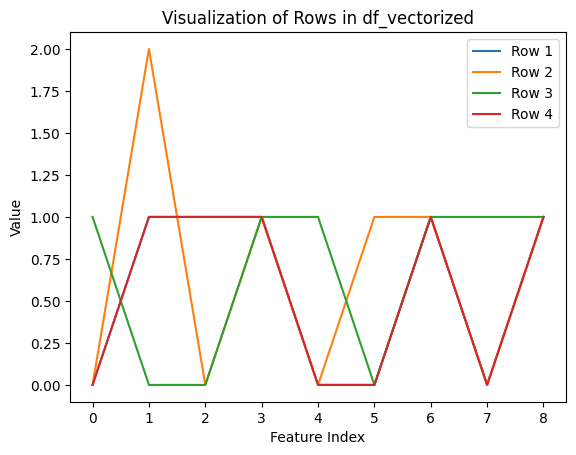

In [42]:
# prompt: df_vectorized의 value를 numpy matrix로 만들곡 각 행을 시각화해줘

import matplotlib.pyplot as plt
import numpy as np

# df_vectorized의 값을 numpy matrix로 변환
matrix = df_vectorized.values

# 각 행을 시각화
for i in range(matrix.shape[0]):
  plt.plot(matrix[i, :], label=f"Row {i+1}")

plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.title("Visualization of Rows in df_vectorized")
plt.legend()
plt.show()


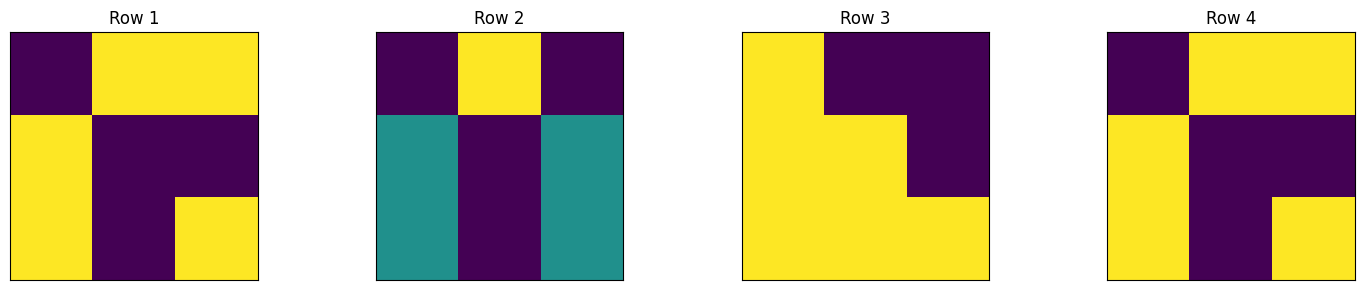

In [45]:
# prompt: df_vectorized의 value를 numpy matrix로 만들곡 각 행 (3,3) 정방형으로 만들어 한 행에 모두 시각화해줘

import matplotlib.pyplot as plt
import numpy as np
# df_vectorized의 값을 numpy matrix로 변환
matrix = df_vectorized.values

# 각 행을 (3,3) 정방형으로 reshape하고 한 행에 모두 시각화
fig, axs = plt.subplots(1, matrix.shape[0], figsize=(15, 3))  # 행 개수에 맞춰 서브플롯 생성

for i in range(matrix.shape[0]):
  row_matrix = matrix[i, :]
  # 3x3 정방행렬로 reshape (데이터가 부족하면 0으로 채움)
  reshape_matrix = np.pad(row_matrix, (0, 9 - len(row_matrix)), 'constant').reshape(3, 3)

  # 이미지로 표현
  im = axs[i].imshow(reshape_matrix, cmap='viridis')  # 'viridis' 컬러맵 사용

  # 축 레이블 제거
  axs[i].set_xticks([])
  axs[i].set_yticks([])

  # 행 번호 추가
  axs[i].set_title(f"Row {i+1}")

plt.tight_layout()
plt.show()


In [46]:
corpus  = df['Quote'].tolist()

In [47]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
df_vectorized = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_vectorized

,000,10,abilities,about,above,absolutely,absurdities,accept,across,act,...,writing,written,wrote,wrung,year,you,youer,your,yours,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# prompt: df_vectorized 의 컬럼명이 수자인 것은 모두 제거해줘

# df_vectorized의 컬럼명이 숫자인 것을 모두 제거
df_vectorized = df_vectorized.loc[:, ~df_vectorized.columns.str.isdigit()]
df_vectorized


,abilities,about,above,absolutely,absurdities,accept,across,act,actually,admiration,...,writing,written,wrote,wrung,year,you,youer,your,yours,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_vectorized['target'] = df['Tag']
df_vectorized

<ipython-input-49-136ed84a2220>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vectorized['target'] = df['Tag']


,abilities,about,above,absolutely,absurdities,accept,across,act,actually,admiration,...,written,wrote,wrung,year,you,youer,your,yours,yourself,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,love
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inspirational
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,life
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,humor
4,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,books
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,reading
96,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2,0,0,0,0,friendship
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,friends
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,truth


# Transformer, BERT
- 가볍게 DistilBERT 모델(https://huggingface.co/tasks/text-classification)


In [64]:
from transformers import pipeline

classifier = pipeline("text-classification", model = "roberta-large-mnli")
classifier("A soccer game with multiple males playing. Some men are playing a sport.")
## [{'label': 'ENTAILMENT', 'score': 0.98}]


config.json:   0%|          | 0.00/688 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'ENTAILMENT', 'score': 0.9883741140365601}]

In [65]:
df.head()

,Quote,Author,Tag,Tag_label
0,“The world as we have created it is a process ...,Albert Einstein,love,0
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,inspirational,1
2,“There are only two ways to live your life. On...,Albert Einstein,life,2
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,humor,3
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,books,4


In [75]:
df['Quote'].head().str[:10]

,Quote
0,“The world
1,“It is our
2,“There are
3,“The perso
4,“Imperfect


In [77]:
classifier(df['Quote'].head().str)

ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [78]:
classifier(df['Quote'].head().tolist())

[{'label': 'NEUTRAL', 'score': 0.6629486680030823},
 {'label': 'NEUTRAL', 'score': 0.7794815301895142},
 {'label': 'NEUTRAL', 'score': 0.5822640061378479},
 {'label': 'NEUTRAL', 'score': 0.730770468711853},
 {'label': 'NEUTRAL', 'score': 0.5926982760429382}]

In [82]:
df['Quote'].sample(10)

,Quote
67,“Finish each day and be done with it. You have...
53,"“If I were not a physicist, I would probably b..."
20,"“I love you without knowing how, or when, or f..."
73,“Think left and think right and think low and ...
71,“Some people never go crazy. What truly horrib...
47,“Only in the darkness can you see the stars.”
95,“You never really understand a person until yo...
22,"“If you judge people, you have no time to love..."
98,"“A person's a person, no matter how small.”"
30,"“The more that you read, the more things you w..."


In [86]:
tf = df['Quote'].sample(10, random_state=11)
tf

,Quote
46,"“A wise girl kisses but doesn't love, listens ..."
49,“Love does not begin and end the way we seem t...
22,"“If you judge people, you have no time to love..."
58,"“When one door of happiness closes, another op..."
41,“You can never get a cup of tea large enough o...
98,"“A person's a person, no matter how small.”"
62,"“Remember, we're madly in love, so it's all ri..."
29,"“One good thing about music, when it hits you,..."
30,"“The more that you read, the more things you w..."
51,“Do one thing every day that scares you.”


In [88]:
result = classifier(tf.tolist())
result

[{'label': 'NEUTRAL', 'score': 0.5159892439842224},
 {'label': 'NEUTRAL', 'score': 0.6627405285835266},
 {'label': 'NEUTRAL', 'score': 0.7256860136985779},
 {'label': 'NEUTRAL', 'score': 0.8519294857978821},
 {'label': 'NEUTRAL', 'score': 0.6687235236167908},
 {'label': 'NEUTRAL', 'score': 0.6606905460357666},
 {'label': 'NEUTRAL', 'score': 0.849288821220398},
 {'label': 'NEUTRAL', 'score': 0.723667323589325},
 {'label': 'NEUTRAL', 'score': 0.9102444648742676},
 {'label': 'NEUTRAL', 'score': 0.6310945153236389}]

In [91]:
# prompt: tf의 추가 변수로 result의 'label'과  'score'를 추가로 생성하고 그 값을 채워 pandas로

import pandas as pd

# ... (기존 코드) ...

tf = df['Quote'].sample(20, random_state=13)
result = classifier(tf.tolist())

# 새로운 컬럼 'label'과 'score' 추가 및 값 채우기
label_list = [item['label'] for item in result]
score_list = [item['score'] for item in result]

tf = pd.DataFrame(tf)
tf['label'] = label_list
tf['score'] = score_list

tf


,Quote,label,score
37,“Any fool can know. The point is to understand.”,NEUTRAL,0.797741
62,"“Remember, we're madly in love, so it's all ri...",NEUTRAL,0.849289
83,“I declare after all there is no enjoyment lik...,NEUTRAL,0.976397
14,"“I like nonsense, it wakes up the brain cells....",NEUTRAL,0.826515
43,"“If you can make a woman laugh, you can make h...",NEUTRAL,0.700585
9,"“A day without sunshine is like, you know, nig...",NEUTRAL,0.602542
44,“Life is like riding a bicycle. To keep your b...,NEUTRAL,0.638202
31,"“Of course it is happening inside your head, H...",NEUTRAL,0.799044
69,“I have heard there are troubles of more than ...,CONTRADICTION,0.798294
57,“There is no friend as loyal as a book.”,NEUTRAL,0.507736
